# Goal

This script's goal is to compare the ECCO and NSIDC (conversed grid) sea ice velocity data for 1992.

These three tasks complete the goal - a) first, it reads ECCO and NSIDC daily sea ice velocity from my computer's directory; b) then, it plays a slideshow of the daily sea ice velocity from both sources and c)finally, it compares the daily sea ice velocity (e.g., spatial maps, difference) from both sources.

## Load data: ECCO

First, I am loading the data from "ECCO Sea Ice Velocity Merged" from my computer. It is also available in the shared drive. 

In [1]:
%%time
import os  
import xarray as xr  
import netCDF4  
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs
from datetime import datetime

CPU times: user 1.06 s, sys: 501 ms, total: 1.56 s
Wall time: 2.74 s


Go to the directory

In [2]:
# Go to the current working directory
ecco_dir = '/Users/aahmed78/Desktop/ECCO/ECCO Sea Ice Velocity/data/'
os.chdir(ecco_dir)
# Am I really in the directory?
! pwd

/Users/aahmed78/Desktop/ECCO/ECCO Sea Ice Velocity/data


In [3]:
# Load the NetCDF file using xarray
year = 1992
file_name = ecco_dir + 'ecco_sea_ice_velocity_{y}.nc'.format(y=year)
ds = xr.open_dataset(file_name)

# Have a closer look at the ds
ds

<xarray.Dataset>
Dimensions:    (i: 90, i_g: 90, j: 90, j_g: 90, tile: 5, time: 366, nv: 2, nb: 4)
Coordinates: (12/13)
  * i          (i) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j          (j) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * tile       (tile) int32 2 5 6 7 10
  * time       (time) datetime64[ns] 1992-01-01T18:00:00 ... 1992-12-31T12:00:00
    ...         ...
    YC         (tile, j, i) float32 ...
    XG         (tile, j_g, i_g) float32 ...
    YG         (tile, j_g, i_g) float32 ...
    time_bnds  (time, nv) datetime64[ns] ...
    XC_bnds    (tile, j, i, nb) float32 ...
    YC_bnds    (tile, j, i, nb) float32 ...
Dimensions without coordinates: nv, nb
Data variables:
    SIuice     (time, tile, j, i_g) float32 ...
    SIvice     (time, tile, j_g, i) float32 ...
Attributes: (12/57)
    acknowledgement:              This research was carried out by the Jet Pr...
    author:                       Ian Fenty and Ou Wang
    cdm_data_type:                Grid
    comment:                      Fields provided on the curvilinear lat-lon-...
    Conventions:                  CF-1.8, ACDD-1.3
    coordinates_comment:          Note: the global 'coordinates' attribute de...
    ...                           ...
    time_coverage_duration:       P1D
    time_coverage_end:            1992-01-02T00:00:00
    time_coverage_resolution:     P1D
    time_coverage_start:          1992-01-01T12:00:00
    title:                        ECCO Sea-Ice Velocity - Daily Mean llc90 Gr...
    uuid:                         a029ca02-4050-11eb-ac63-0cc47a3f479b

### ECCO variables

Just checking each variables from the NetCDF files

In [5]:
ds.SIuice.shape

(366, 5, 90, 90)

### ECCO datetime

Add a new variable "datetime" which will only contain the date as this format yyyy-dd-mm. Because this formatting is clean and easy to work with. Specially, in the figure title it has more control.

In [8]:
from datetime import datetime
# To see the dates in the desired format
formatted_dates = ds.time.values.astype('datetime64[D]').astype(str)
ds = ds.assign_coords(datetime=('time', formatted_dates))
ds.datetime

<xarray.DataArray 'datetime' (time: 366)>
array(['1992-01-01', '1992-01-02', '1992-01-03', '1992-01-04',
       '1992-01-05', '1992-01-06', '1992-01-07', '1992-01-08',
       '1992-01-09', '1992-01-10', '1992-01-11', '1992-01-12',
       '1992-01-13', '1992-01-14', '1992-01-15', '1992-01-16',
       '1992-01-17', '1992-01-18', '1992-01-19', '1992-01-20',
       '1992-01-21', '1992-01-22', '1992-01-23', '1992-01-24',
       '1992-01-25', '1992-01-26', '1992-01-27', '1992-01-28',
       '1992-01-29', '1992-01-30', '1992-01-31', '1992-02-01',
       '1992-02-02', '1992-02-03', '1992-02-04', '1992-02-05',
       '1992-02-06', '1992-02-07', '1992-02-08', '1992-02-09',
       '1992-02-10', '1992-02-11', '1992-02-12', '1992-02-13',
       '1992-02-14', '1992-02-15', '1992-02-16', '1992-02-17',
       '1992-02-18', '1992-02-19', '1992-02-20', '1992-02-21',
       '1992-02-22', '1992-02-23', '1992-02-24', '1992-02-25',
       '1992-02-26', '1992-02-27', '1992-02-28', '1992-02-29',
       '1992-03-01', '1992-03-02', '1992-03-03', '1992-03-04',
       '1992-03-05', '1992-03-06', '1992-03-07', '1992-03-08',
       '1992-03-09', '1992-03-10', '1992-03-11', '1992-03-12',
       '1992-03-13', '1992-03-14', '1992-03-15', '1992-03-16',
       '1992-03-17', '1992-03-18', '1992-03-19', '1992-03-20',
...
       '1992-10-15', '1992-10-16', '1992-10-17', '1992-10-18',
       '1992-10-19', '1992-10-20', '1992-10-21', '1992-10-22',
       '1992-10-23', '1992-10-24', '1992-10-25', '1992-10-26',
       '1992-10-27', '1992-10-28', '1992-10-29', '1992-10-30',
       '1992-10-31', '1992-11-01', '1992-11-02', '1992-11-03',
       '1992-11-04', '1992-11-05', '1992-11-06', '1992-11-07',
       '1992-11-08', '1992-11-09', '1992-11-10', '1992-11-11',
       '1992-11-12', '1992-11-13', '1992-11-14', '1992-11-15',
       '1992-11-16', '1992-11-17', '1992-11-18', '1992-11-19',
       '1992-11-20', '1992-11-21', '1992-11-22', '1992-11-23',
       '1992-11-24', '1992-11-25', '1992-11-26', '1992-11-27',
       '1992-11-28', '1992-11-29', '1992-11-30', '1992-12-01',
       '1992-12-02', '1992-12-03', '1992-12-04', '1992-12-05',
       '1992-12-06', '1992-12-07', '1992-12-08', '1992-12-09',
       '1992-12-10', '1992-12-11', '1992-12-12', '1992-12-13',
       '1992-12-14', '1992-12-15', '1992-12-16', '1992-12-17',
       '1992-12-18', '1992-12-19', '1992-12-20', '1992-12-21',
       '1992-12-22', '1992-12-23', '1992-12-24', '1992-12-25',
       '1992-12-26', '1992-12-27', '1992-12-28', '1992-12-29',
       '1992-12-30', '1992-12-31'], dtype='<U28')
Coordinates:
  * time      (time) datetime64[ns] 1992-01-01T18:00:00 ... 1992-12-31T12:00:00
    datetime  (time) <U28 '1992-01-01' '1992-01-02' ... '1992-12-31'

In [9]:
ds # Look, it will have a new coords now. 
# The new coords 'datetime' is added and we will be using it instead of 'time';

<xarray.Dataset>
Dimensions:    (i: 90, i_g: 90, j: 90, j_g: 90, tile: 5, time: 366, nv: 2, nb: 4)
Coordinates: (12/14)
  * i          (i) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j          (j) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * tile       (tile) int32 2 5 6 7 10
  * time       (time) datetime64[ns] 1992-01-01T18:00:00 ... 1992-12-31T12:00:00
    ...         ...
    XG         (tile, j_g, i_g) float32 ...
    YG         (tile, j_g, i_g) float32 ...
    time_bnds  (time, nv) datetime64[ns] ...
    XC_bnds    (tile, j, i, nb) float32 ...
    YC_bnds    (tile, j, i, nb) float32 ...
    datetime   (time) <U28 '1992-01-01' '1992-01-02' ... '1992-12-31'
Dimensions without coordinates: nv, nb
Data variables:
    SIuice     (time, tile, j, i_g) float32 ...
    SIvice     (time, tile, j_g, i) float32 ...
Attributes: (12/57)
    acknowledgement:              This research was carried out by the Jet Pr...
    author:                       Ian Fenty and Ou Wang
    cdm_data_type:                Grid
    comment:                      Fields provided on the curvilinear lat-lon-...
    Conventions:                  CF-1.8, ACDD-1.3
    coordinates_comment:          Note: the global 'coordinates' attribute de...
    ...                           ...
    time_coverage_duration:       P1D
    time_coverage_end:            1992-01-02T00:00:00
    time_coverage_resolution:     P1D
    time_coverage_start:          1992-01-01T12:00:00
    title:                        ECCO Sea-Ice Velocity - Daily Mean llc90 Gr...
    uuid:                         a029ca02-4050-11eb-ac63-0cc47a3f479b

In [10]:
ds.XC.sel(tile = 5)

<xarray.DataArray 'XC' (j: 90, i: 90)>
[8100 values with dtype=float32]
Coordinates:
  * i        (i) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    tile     int32 5
    XC       (j, i) float32 ...
    YC       (j, i) float32 ...
Attributes:
    long_name:              longitude of tracer grid cell center
    units:                  degrees_east
    coordinate:             YC XC
    bounds:                 XC_bnds
    comment:                nonuniform grid spacing
    coverage_content_type:  coordinate
    standard_name:          longitude

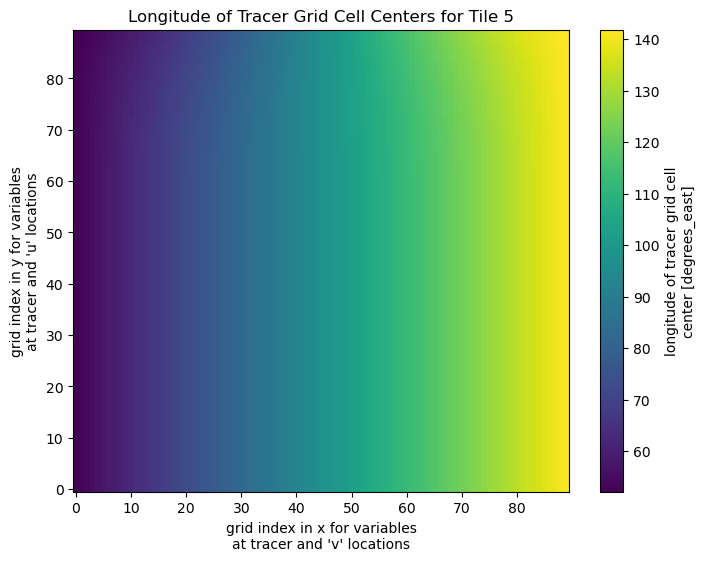

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
# Plot the XC data for tile 5
ds.XC.sel(tile=5).plot(cmap='viridis')
plt.title('Info on Tracer Grid Cell Centers for Tile 5')
# Show the plot
plt.show()


### ECCO speed

Calculate speed for each day where speed = sqrt(u^2+v^2)

In [ ]:
# Calculate speed for the ARctic tile
speed = []

for t in range(len(ds.time)):
    SIuice_day = ds.SIuice.isel(time=t, tile=2)
    SIvice_day = ds.SIvice.isel(time=t, tile=2)
    
    speed_day = np.sqrt(SIuice_day ** 2 + SIvice_day ** 2)
    speed.append(speed_day)

# Combine the results into a single DataArray 
speed_tile2 = xr.concat(speed, dim='time')
ds['speed_tile2'] = speed_tile2

# Save or inspect ds['speed_tile2'] as needed
print(ds['speed_tile2'])